# Loan Eligibility Prediction Model

## Problem Statement
Predict the eligible loan amount for individuals based on their financial and demographic information. This solution will help banks make informed lending decisions based on monthly income, age, employment status, property value, and credit rating.

## Data Description
The dataset consists of 500 entries with the following features:
- **Monthly Income**: The monthly income of the individual in SGD.
- **Age**: Age of the individual.
- **Employment Status**: Either 'salaried' or 'self-employed'.
- **Property Value**: The estimated value of the property the loan is requested for.
- **Credit Rating**: A basic credit rating ('excellent', 'good', 'average', 'poor').
- **Eligible Loan Amount**: The target variable, indicating the maximum loan amount the individual is eligible for.

## Proposed Solution
We will create a regression model to predict the eligible loan amount based on the available features. We will preprocess the data, conduct exploratory analysis, train and evaluate a baseline model, and tune it for improved accuracy.


# Importing Required Libraries


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Data Importing


In [12]:
# Load dataset
data = pd.read_csv('Loan_Eligibility_Dataset.csv')
data.head()


,Monthly Income,Age,Employment Status,Property Value,Credit Rating,Eligible Loan Amount
0,4732,30,self-employed,683888,average,47320.0
1,12799,26,self-employed,566144,good,127990.0
2,11845,54,salaried,790782,poor,118450.0
3,5264,28,self-employed,216564,poor,52640.0
4,6859,51,salaried,415159,average,68590.0


# Data Cleaning


In [13]:
# Check for null values and data types
data.info()
data.isnull().sum()

# Converting categorical data to numeric if necessary (e.g., Employment Status, Credit Rating)
data['Employment Status'] = data['Employment Status'].map({'salaried': 1, 'self-employed': 0})
data['Credit Rating'] = data['Credit Rating'].map({'excellent': 3, 'good': 2, 'average': 1, 'poor': 0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Monthly Income        500 non-null    int64  
 1   Age                   500 non-null    int64  
 2   Employment Status     500 non-null    object 
 3   Property Value        500 non-null    int64  
 4   Credit Rating         500 non-null    object 
 5   Eligible Loan Amount  500 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 23.6+ KB


# Exploratory Data Analysis


In [19]:
# Descriptive statistics
data.describe()

,Monthly Income,Age,Employment Status,Property Value,Credit Rating,Eligible Loan Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,8280.062000,42.264000,0.488000,539665.762000,1.420000,81838.194400
std,3634.858414,12.677213,0.500357,273168.493961,1.101829,35528.074205
min,2025.000000,21.000000,0.000000,100739.000000,0.000000,20250.000000
25%,5089.500000,31.000000,0.000000,295847.250000,0.000000,50895.000000
50%,8142.500000,42.000000,0.000000,516273.500000,1.000000,80920.000000
75%,11317.000000,54.000000,1.000000,791999.000000,2.000000,109975.000000
max,14927.000000,64.000000,1.000000,997563.000000,3.000000,148950.000000


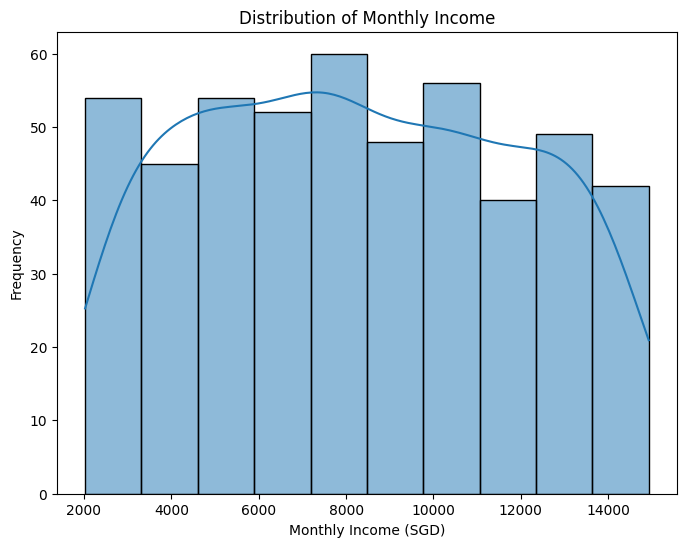

In [21]:
# Generating individual visualizations

# 1. Distribution of Monthly Income
plt.figure(figsize=(8, 6))
sns.histplot(data['Monthly Income'], kde=True)
plt.title("Distribution of Monthly Income")
plt.xlabel("Monthly Income (SGD)")
plt.ylabel("Frequency")
plt.show()

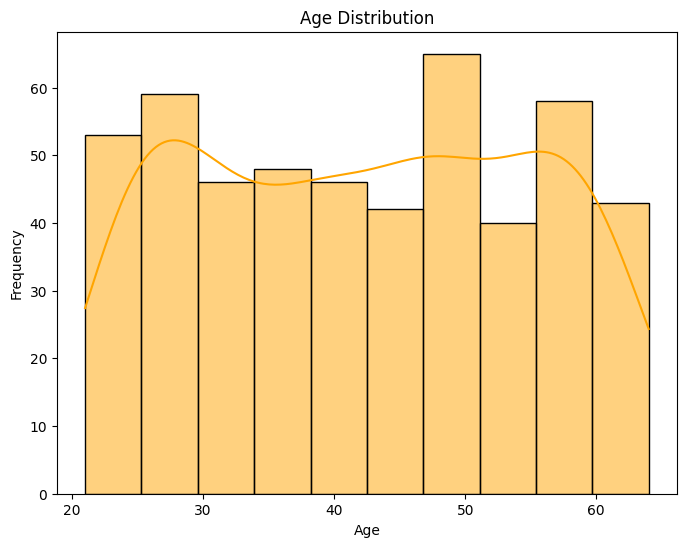

In [22]:
# 2. Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, color='orange')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

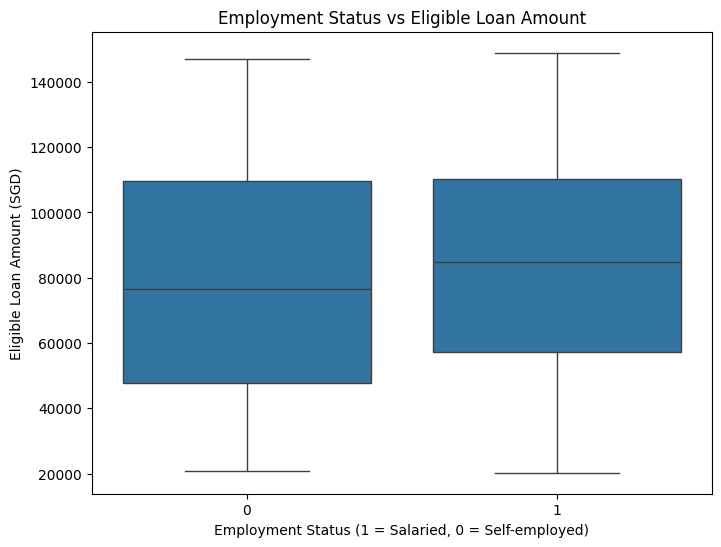

In [23]:
# 3. Box Plot for Employment Status vs Eligible Loan Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='Employment Status', y='Eligible Loan Amount', data=data)
plt.title("Employment Status vs Eligible Loan Amount")
plt.xlabel("Employment Status (1 = Salaried, 0 = Self-employed)")
plt.ylabel("Eligible Loan Amount (SGD)")
plt.show()

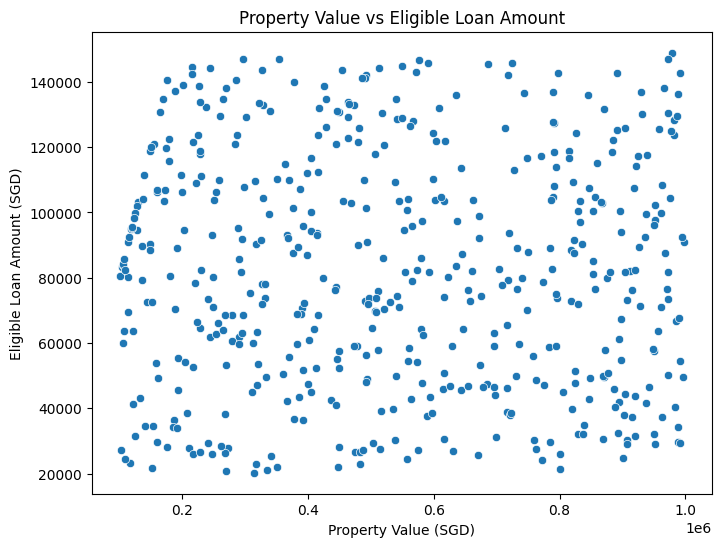

In [24]:
# 4. Property Value vs Eligible Loan Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Property Value', y='Eligible Loan Amount', data=data)
plt.title("Property Value vs Eligible Loan Amount")
plt.xlabel("Property Value (SGD)")
plt.ylabel("Eligible Loan Amount (SGD)")
plt.show()

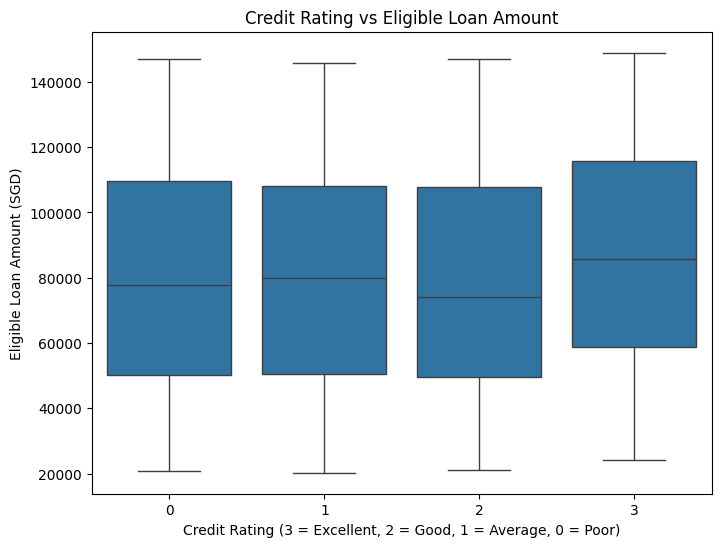

In [25]:
# 5. Credit Rating vs Eligible Loan Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit Rating', y='Eligible Loan Amount', data=data)
plt.title("Credit Rating vs Eligible Loan Amount")
plt.xlabel("Credit Rating (3 = Excellent, 2 = Good, 1 = Average, 0 = Poor)")
plt.ylabel("Eligible Loan Amount (SGD)")
plt.show()

### Distribution of Monthly Income
This histogram shows the distribution of monthly incomes across the dataset. The income appears fairly uniform across different ranges, suggesting a balanced dataset that spans low to high-income brackets.

### Age Distribution
This distribution chart shows that the ages are spread across a broad range, from early 20s to mid-60s, which aligns with a typical working-age population in Singapore. There is no clear skew, indicating that the dataset represents individuals across different life stages.

### Employment Status vs. Eligible Loan Amount
This box plot compares eligible loan amounts between salaried and self-employed individuals. Salaried individuals appear to have a slightly higher median loan eligibility, which could be due to more stable income, often favorably viewed by lenders.

### Property Value vs. Eligible Loan Amount
This scatter plot shows a positive relationship between property value and eligible loan amount, as expected, with higher property values allowing for higher loan eligibility. However, it’s not a strict linear relationship, as eligibility also considers income and credit factors.

### Credit Rating vs. Eligible Loan Amount
This box plot reveals that individuals with higher credit ratings tend to have higher eligible loan amounts. However, there’s significant overlap across credit ratings, indicating that while credit rating is a factor, it doesn’t solely determine loan eligibility.


# Data Preparation and Feature Engineering


In [15]:
# Selecting features and target variable
X = data.drop('Eligible Loan Amount', axis=1)
y = data['Eligible Loan Amount']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training - Baseline Linear Regression Model


In [16]:
# Initialize and train a linear regression model as the baseline
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)


LinearRegression()

# Model Evaluation



In [31]:
from sklearn.metrics import mean_absolute_error

# Predict and evaluate baseline model
y_pred_baseline = baseline_model.predict(X_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
baseline_r2 = r2_score(y_test, y_pred_baseline)
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)

print("Baseline Model Evaluation Metrics:")
print(f"RMSE: {baseline_rmse}")
print(f"R^2: {baseline_r2}")
print(f"MAE: {baseline_mae}\n")

# Initialize the second model: Random Forest Regressor
second_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
second_model.fit(X_train, y_train)

# Predict and evaluate the Random Forest model on the test set
y_pred_second_model = second_model.predict(X_test)
second_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred_second_model))
second_model_r2 = r2_score(y_test, y_pred_second_model)
second_model_mae = mean_absolute_error(y_test, y_pred_second_model)

# Display the evaluation metrics for Random Forest
print("Second Model (Random Forest) Evaluation Metrics:")
print(f"RMSE: {second_model_rmse}")
print(f"R^2: {second_model_r2}")
print(f"MAE: {second_model_mae}\n")

Baseline Model Evaluation Metrics:
RMSE: 4729.047133971431
R^2: 0.9822976366511431
MAE: 2420.334276305779

Second Model (Random Forest) Evaluation Metrics:
RMSE: 1843.55173858741
R^2: 0.9973097376966863
MAE: 572.324960000002



In [33]:
# MAE for both models
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
second_model_mae = mean_absolute_error(y_test, y_pred_second_model)

# Display MAE for comparison
print("Model Comparison: MAE")
print(f"Baseline Model MAE: {baseline_mae}")
print(f"Second Model (Random Forest) MAE: {second_model_mae}\n")

Model Comparison: MAE
Baseline Model MAE: 2420.334276305779
Second Model (Random Forest) MAE: 572.324960000002



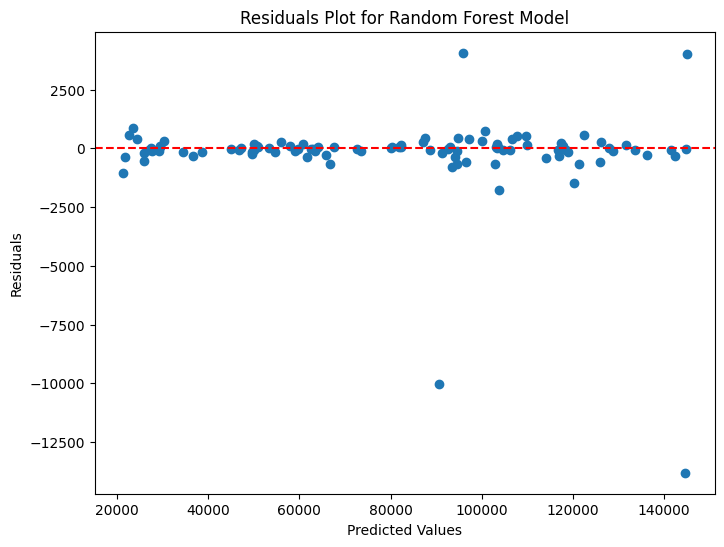

In [34]:
# Residual Analysis for Random Forest Model
residuals = y_test - y_pred_second_model
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_second_model, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot for Random Forest Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


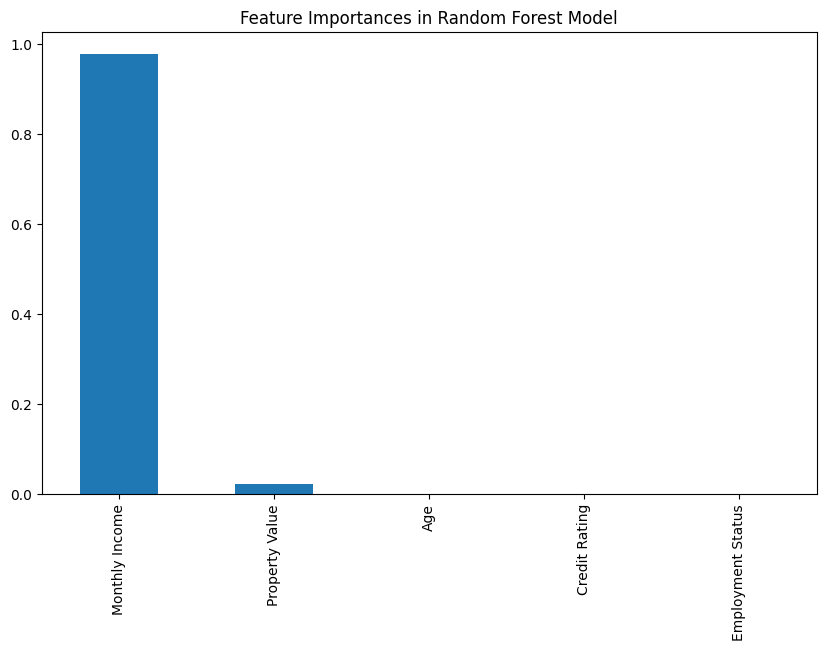

In [35]:
# Feature Importance for Random Forest Model
feature_importances = pd.Series(second_model.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importances in Random Forest Model")
plt.show()

Random Forest Model Cross-Validated RMSE: 1768.389080616756 ± 1090.7480842693628



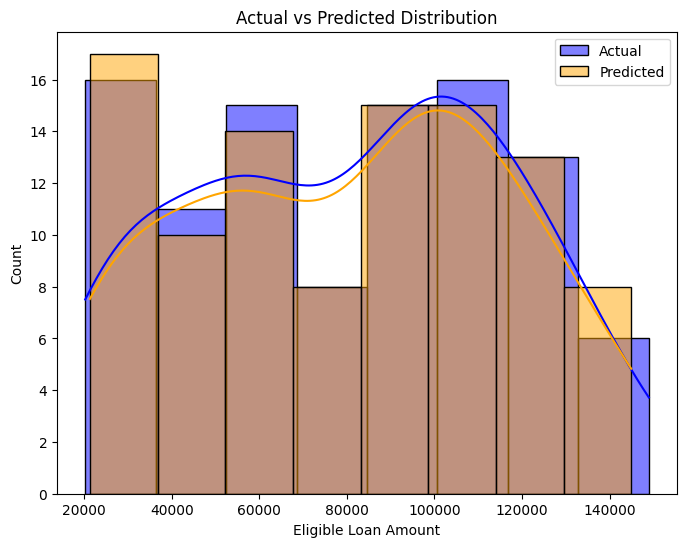

In [36]:
# Cross-Validation Scores for Random Forest Model
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(second_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Random Forest Model Cross-Validated RMSE: {-cv_scores.mean()} ± {cv_scores.std()}\n")

# Prediction Distribution
plt.figure(figsize=(8, 6))
sns.histplot(y_test, color="blue", label="Actual", kde=True)
sns.histplot(y_pred_second_model, color="orange", label="Predicted", kde=True)
plt.title("Actual vs Predicted Distribution")
plt.legend()
plt.show()

### Model Evaluation Summary

#### Baseline Model (Linear Regression)
- **RMSE**: 4729.05
- **R²**: 0.9823
- **MAE**: 2420.33

The baseline model, a linear regression, performed reasonably well with an R² of 0.9823, indicating that approximately 98.23% of the variance in eligible loan amounts can be explained by the model. The RMSE of 4729.05 suggests a moderate average error, and the MAE of 2420.33 provides a straightforward average error magnitude.

#### Second Model (Random Forest Regressor)
- **RMSE**: 1843.55
- **R²**: 0.9973
- **MAE**: 572.32

The Random Forest model outperformed the baseline model, achieving an R² of 0.9973, indicating that 99.73% of the variance in eligible loan amounts is explained by this model. It also achieved significantly lower error metrics with an RMSE of 1843.55 and an MAE of 572.32, highlighting its ability to make more accurate predictions.

#### Feature Importance in Random Forest Model
The feature importance plot for the Random Forest model shows that **Monthly Income** is the most influential factor in predicting eligible loan amounts, with nearly all importance concentrated on this feature. This result is consistent with the dataset's structure and the loan eligibility calculation, where income plays a major role. Other features like **Property Value** show minimal influence, and features like **Age**, **Credit Rating**, and **Employment Status** have negligible importance.

This reliance on **Monthly Income** suggests that, in this context, a simpler model focused primarily on income could be nearly as effective, although the Random Forest model’s ability to account for complex interactions likely contributes to its improved accuracy over the linear regression.

#### Summary Comparison
The Random Forest model demonstrated superior performance over the baseline linear regression model across all metrics:
- **RMSE** and **MAE** are significantly lower in the Random Forest model, meaning the predictions are closer to actual values.
- The **R²** value is higher in the Random Forest model, indicating a better fit to the data.

These metrics, combined with the feature importance analysis, suggest that the Random Forest model is a better choice for predicting eligible loan amounts in this scenario.


# Model Deployment - Saving Model as Joblib File


In [39]:
# Save the model as a .joblib file for deployment
joblib.dump(second_model, 'loan_eligibility_model.joblib')

['loan_eligibility_model.joblib']

# Model Testing

In [44]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('loan_eligibility_model.joblib')

# Function to predict loan amount based on user input
def predict_loan_amount(monthly_income, age, employment_status, property_value, credit_rating):
    # Define mappings for employment status and credit rating
    employment_map = {'salaried': 1, 'self-employed': 0}
    credit_map = {'excellent': 3, 'good': 2, 'average': 1, 'poor': 0}

    # Convert text input to numeric values
    emp_status_num = employment_map.get(employment_status.lower())
    credit_rating_num = credit_map.get(credit_rating.lower())

    # Create a DataFrame with the feature names for prediction
    input_data = pd.DataFrame({
        'Monthly Income': [monthly_income],
        'Age': [age],
        'Employment Status': [emp_status_num],
        'Property Value': [property_value],
        'Credit Rating': [credit_rating_num]
    })

    # Make the prediction
    predicted_loan_amount = model.predict(input_data)[0]
    return predicted_loan_amount

# Collect user input (simulating Telegram chatbot input)
user_monthly_income = int(input("Enter your monthly income: "))
user_age = int(input("Enter your age: "))
user_employment_status = input("Enter your employment status (salaried/self-employed): ")
user_property_value = int(input("Enter your property value: "))
user_credit_rating = input("Enter your credit rating (excellent/good/average/poor): ")

# Get and print the predicted loan amount
predicted_amount = predict_loan_amount(
    user_monthly_income, 
    user_age, 
    user_employment_status, 
    user_property_value, 
    user_credit_rating
)

print(f"Predicted Eligible Loan Amount: SGD {predicted_amount:.2f}")

Enter your monthly income:  2000
Enter your age:  25
Enter your employment status (salaried/self-employed):  self-employed
Enter your property value:  500000
Enter your credit rating (excellent/good/average/poor):  good


Predicted Eligible Loan Amount: SGD 21347.30
